## Movie Recommendation System

In [78]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ensures to display the graph within the notebook
%matplotlib inline 

In [79]:
#importing and reading the dataset1(movies)
df_movies = pd.read_csv("/Users/gauravvraii/Lab-INFO6105/Mini Project/ml-latest-small/movies.csv")
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [80]:
#importing and reading the dataset2(ratings)
df_ratings = pd.read_csv("/Users/gauravvraii/Lab-INFO6105/Mini Project/ml-latest-small/ratings.csv")
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**>>Displaying of the movies and rating datasets using the head() function**

In [81]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [88]:
#Merging the movies and ratings datasets
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [89]:
movie_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [85]:
# checking the missing values in the dataset
movie_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

**>>As we can see there is missing null values in "overview" so we have to clean and then move forward with the dataset and perform operations**

# Data Visualization

**1. Distribution of Movie Genres:** The plot visualizes the distribution of movie genres and it extracts and counts the occurrence of genres and displays the top 10 genres by count.

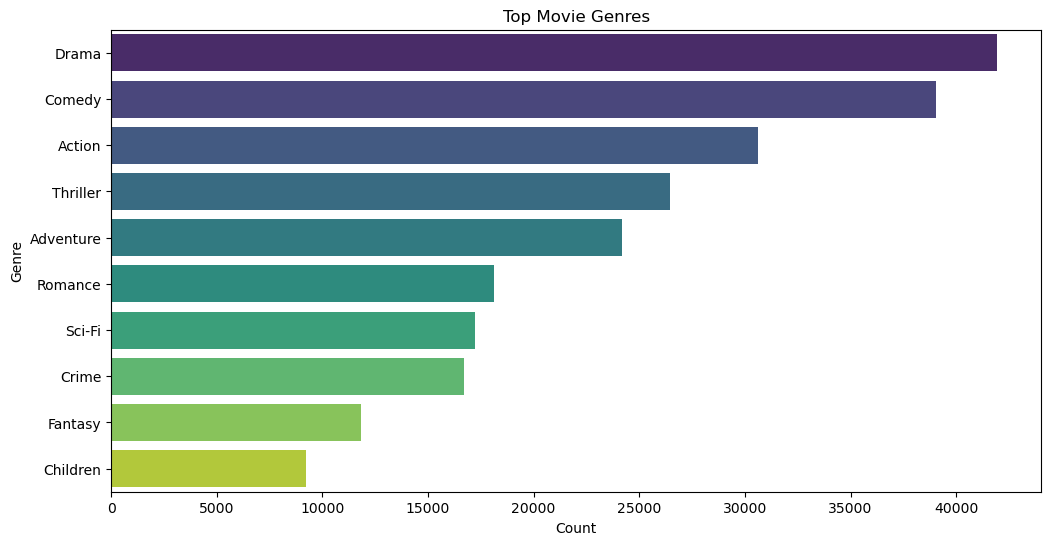

In [ ]:
#Extracting and counting movie genres
genres_count = movie_data['genres'].str.split('|', expand=True).stack().value_counts()

# Plot the top N genres
top_genres = genres_count.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insights:** As we can see the "drama" movie genre tops the chart which seems users like the "drama" movie more as compared to other genres.

**2. Distribution of User Ratings:** The plot shows the distribution of user ratings and counts the number of ratings for each rating value (from 1 to 5).

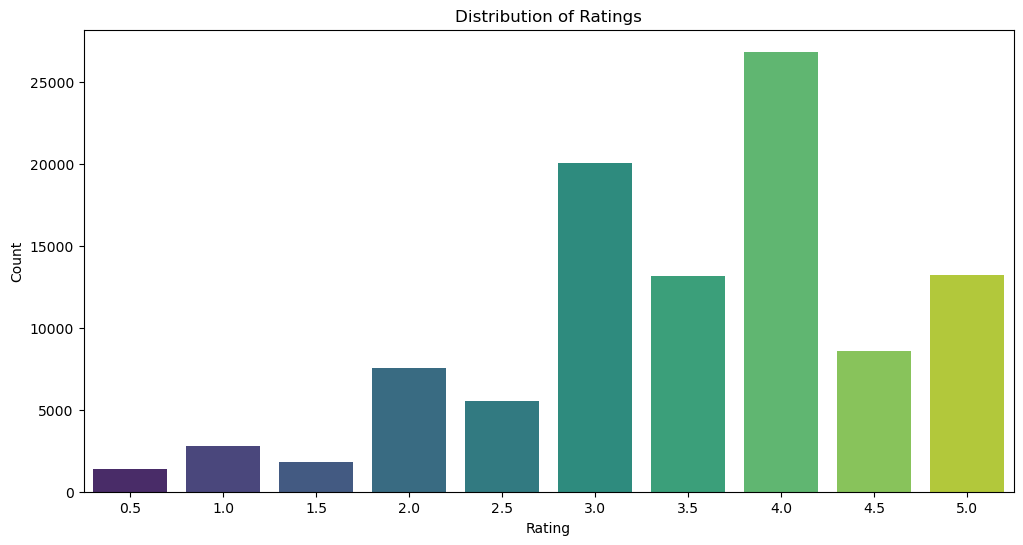

In [ ]:

# Plot 2: Distribution of User Ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=movie_data, palette="viridis")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Insights:** As we can see the popularity of different rating values and understand how users rate movies.

**3. Top-Rated Movies:** This plot displays the top-rated movies based on average user ratings.

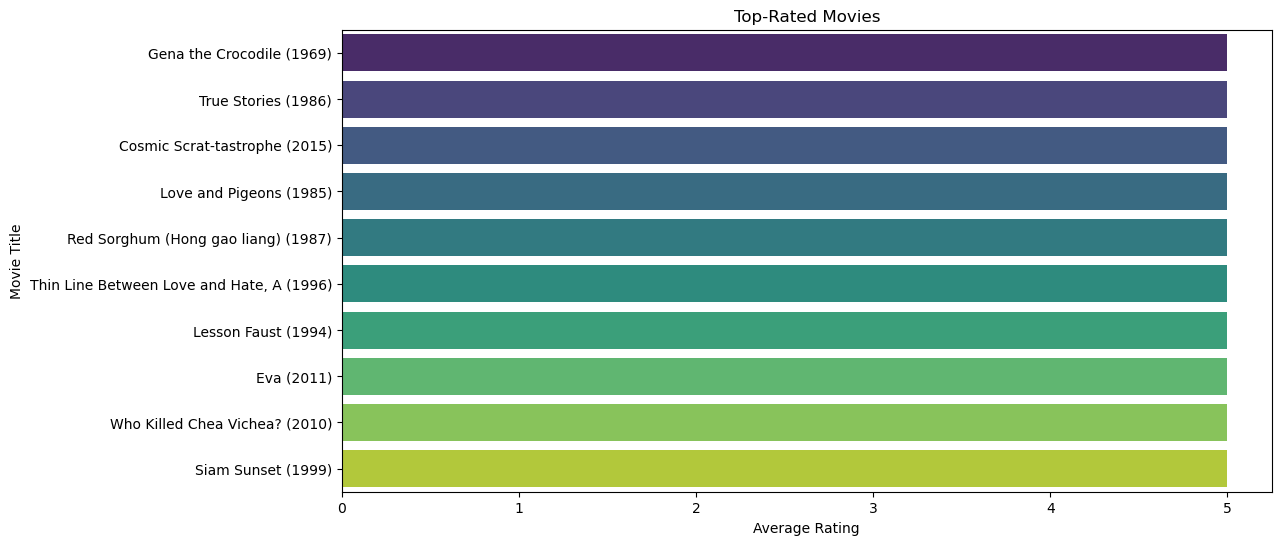

In [ ]:
# Calculate the average rating for each movie
movie_ratings = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)[:10]

# Bar chart for top-rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_ratings.values, y=movie_ratings.index, palette='viridis')
plt.title('Top-Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

**Insights:** These are the top-rated movies based on the user ratings.

**4. Ratings Heatmap:** This plot displays how users have rated movies across different genres.

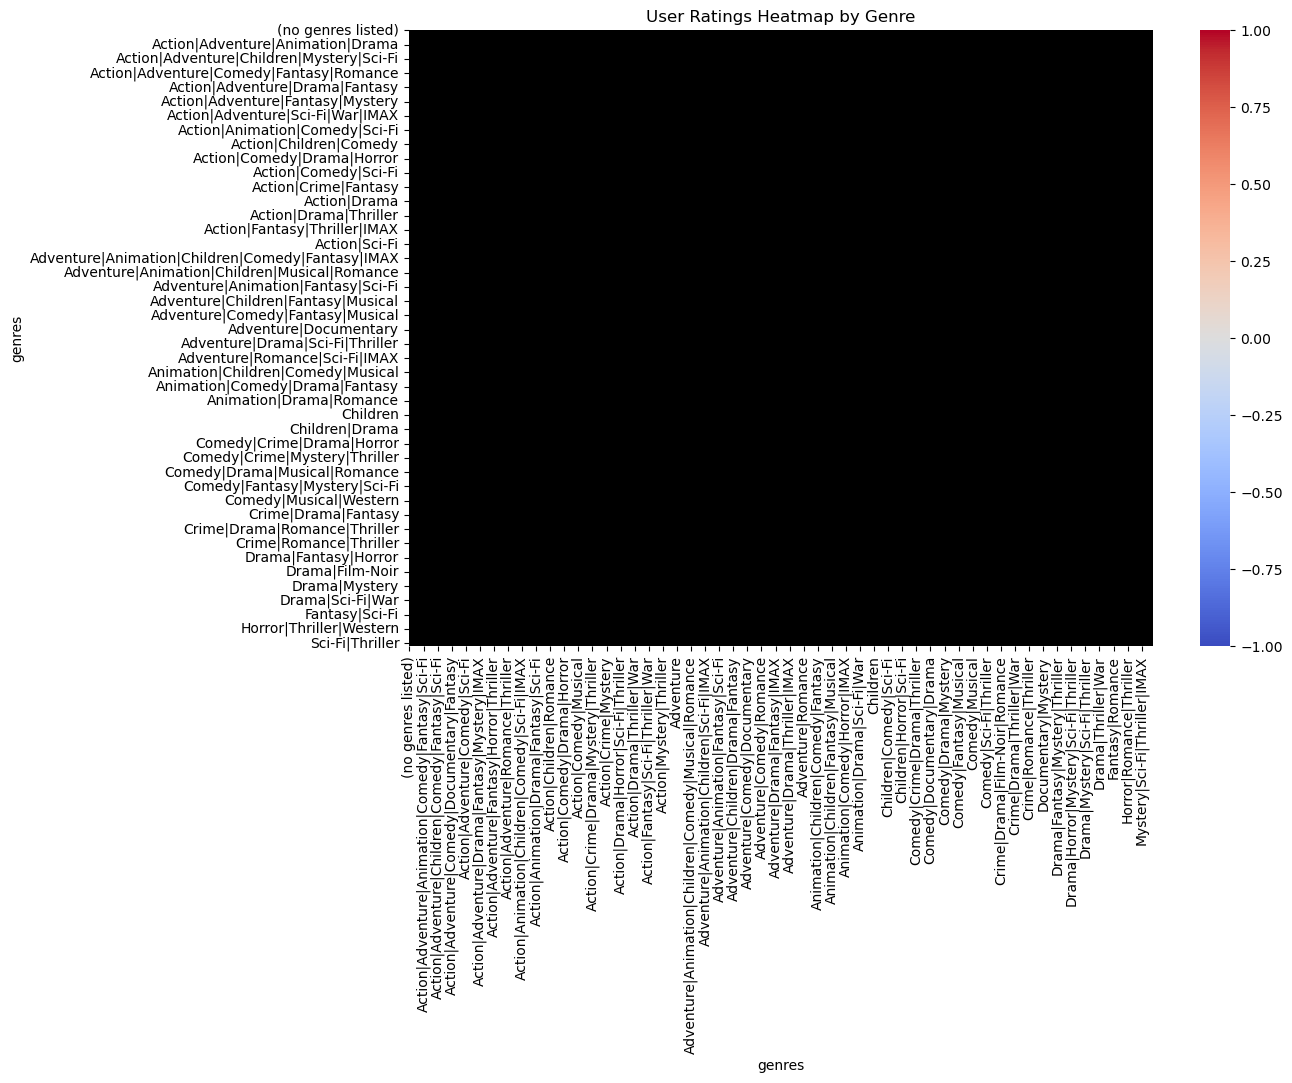

In [ ]:
# Creating a genre matrix
genre_matrix = movie_data.pivot_table(index='userId', columns='genres', values='rating')

plt.figure(figsize=(12, 8))
sns.heatmap(genre_matrix.corr(), cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('User Ratings Heatmap by Genre')
plt.show()

## Building the Recommendation Model

**1. Collaborative Filtering Model:** We will use the Surprise library which is specifically designed for building recommendation systems.

In [ ]:
#Installing surprise library from sckit learn
! pip install scikit-surprise

In [91]:
#Dataset module is used to load the movie ratings dataset into the Surprise format, making it compatible with various recommendation algorithms.
#Reader module is used to specify the rating scale of the dataset, where ratings typically range from 1 to 5.
#KNNBasic is used as the collaborative filtering method for making recommendations. The algorithm is initialized with parameters that determine the similarity measure.
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

#Loading the data into the Surprise format
data = Dataset.load_from_df(movie_data[['userId', 'movieId', 'rating']], reader)

#Spliting the data into a training set and a testing set
X_trainset, y_testset = train_test_split(data, test_size=0.2)

#Building the recommendation model using KNN
model = KNNBasic(sim_options={'user_based': True})
model.fit(X_trainset)

#Making predictions on the test set
predictions = model.test(y_testset)

#Calculating and printing RMSE
# RMSE = (Root Mean Squared Error) 
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9402
RMSE: 0.9401847826170371


**This code builds a basic collaborative filtering model using the Surprise library, trains it on the training data, and evaluates 
it on the test data using RMSE(Root Mean Squared Error).**

**>>Building Recommendations:** Creating movie recommendations for a specific user and we will recommend movies based on the user's preferences.

In [92]:
#Replace the 'user_id' with the user you want to recommend movies:
user_id = 5

#Get a list of all movie IDs
movie_ids = movie_data['movieId'].unique()

#Finding the movies that the user has not rated
user_rated_movies = movie_data[movie_data['userId'] == user_id]['movieId']
unrated_movies = [movie_id for movie_id in movie_ids if movie_id not in user_rated_movies]

#Predict ratings for unrated movies
predictions = [model.predict(user_id, movie_id) for movie_id in unrated_movies]
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top N movie recommendations
top_n = 5
recommended_movie_ids = [prediction.iid for prediction in predictions[:top_n]]

# Get movie titles for recommended movies
recommended_movies = df_movies[df_movies['movieId'].isin(recommended_movie_ids)]['title']

print(f"Top {top_n} Movie Recommendations for User {user_id}:")
for movie_title in recommended_movies:
    print(movie_title)


Top 5 Movie Recommendations for User 5:
Party Girl (1995)
Ponette (1996)
Goal! The Dream Begins (Goal!) (2005)
Hunger (2008)
The Jinx: The Life and Deaths of Robert Durst (2015)


**This code will provide the top N movie recommendations for that user.**

**>>Cross-Validation:** Performing cross-validation to evaluate the model's performance more accurately. This helps prevent overfitting and gives you a better estimate of how well the model will work.

In [ ]:
from surprise.model_selection import cross_validate
#MAE = (Mean Absolute Error)
results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9408  0.9494  0.9427  0.9461  0.9491  0.9456  0.0034  
MAE (testset)     0.7218  0.7262  0.7248  0.7243  0.7286  0.7251  0.0023  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.35    0.36    0.35    0.35    0.41    0.37    0.02    


## Accuracy Analysis
**2. Implementing a movie recommendation system using Porter Stemming, we need to preprocess the text data in the movie titles to apply stemming.** 
**Porter Stemming is a text normalization technique that reduces words to their root form.**

In [ ]:
#importing libraries
from nltk.stem import PorterStemmer

In [93]:
stemmer = PorterStemmer()
movie_data['title'] = movie_data['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

reader = Reader(rating_scale=(1, 5))
#Loading the data into the Surprise format
data = Dataset.load_from_df(movie_data[['userId', 'movieId', 'rating']], reader)

#Spliting the data into a training set and a testing set
X_trainset, y_testset = train_test_split(data, test_size=0.2)

# Build the recommendation model using KNN
model = KNNBasic(sim_options={'user_based': True})
model.fit(X_trainset)

# Make predictions on the test set
predictions = model.test(y_testset)

# Calculate and print RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9538
RMSE: 0.9538100336661486


**#3. Content-Based Recommendation:** Implementing a movie recommendation system using cosine similarity, we will create a content-based recommendation system. In this approach, we will use the movie's features (e.g., movie genres) to calculate the cosine similarity between movies and make recommendation of movies based on their similarity to user preferences.

In [ ]:
#Importing TfidVectorizer and linear_kernel from sklearn library
#TFIDF Vectorizer for movie genres to represent movies as numerical vectors. These vectors capture the importance of different genres for each movie.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
#Creating a TFIDF vectorizer to convert genres into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_movies['genres'])

#Calculating the cosine similarity between movies based on their genre features
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [94]:
#Defining a "recommend" function which will recommend movies based on cosine similarity
def recommend(title, cosine_sim=cosine_sim):
    
    index = df_movies.index[df_movies['title'] == title].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 recommended movies
    return df_movies['title'].iloc[movie_indices]


In [ ]:
#Using the recommend feature
recommend("Jumanji (1995)")

53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object

In [ ]:
#Using the recommend feature
recommend("Flint (2017)")

25                     Othello (1995)
30             Dangerous Minds (1995)
36    Cry, the Beloved Country (1995)
39                 Restoration (1995)
50                     Georgia (1995)
Name: title, dtype: object